In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")


In [2]:
boston = tf.keras.datasets.boston_housing

In [3]:

dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [4]:

boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((404, 13), (404,), (102, 13), (102,))

In [7]:
scaler = StandardScaler()




In [8]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'), # Changed shape to (13,)
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

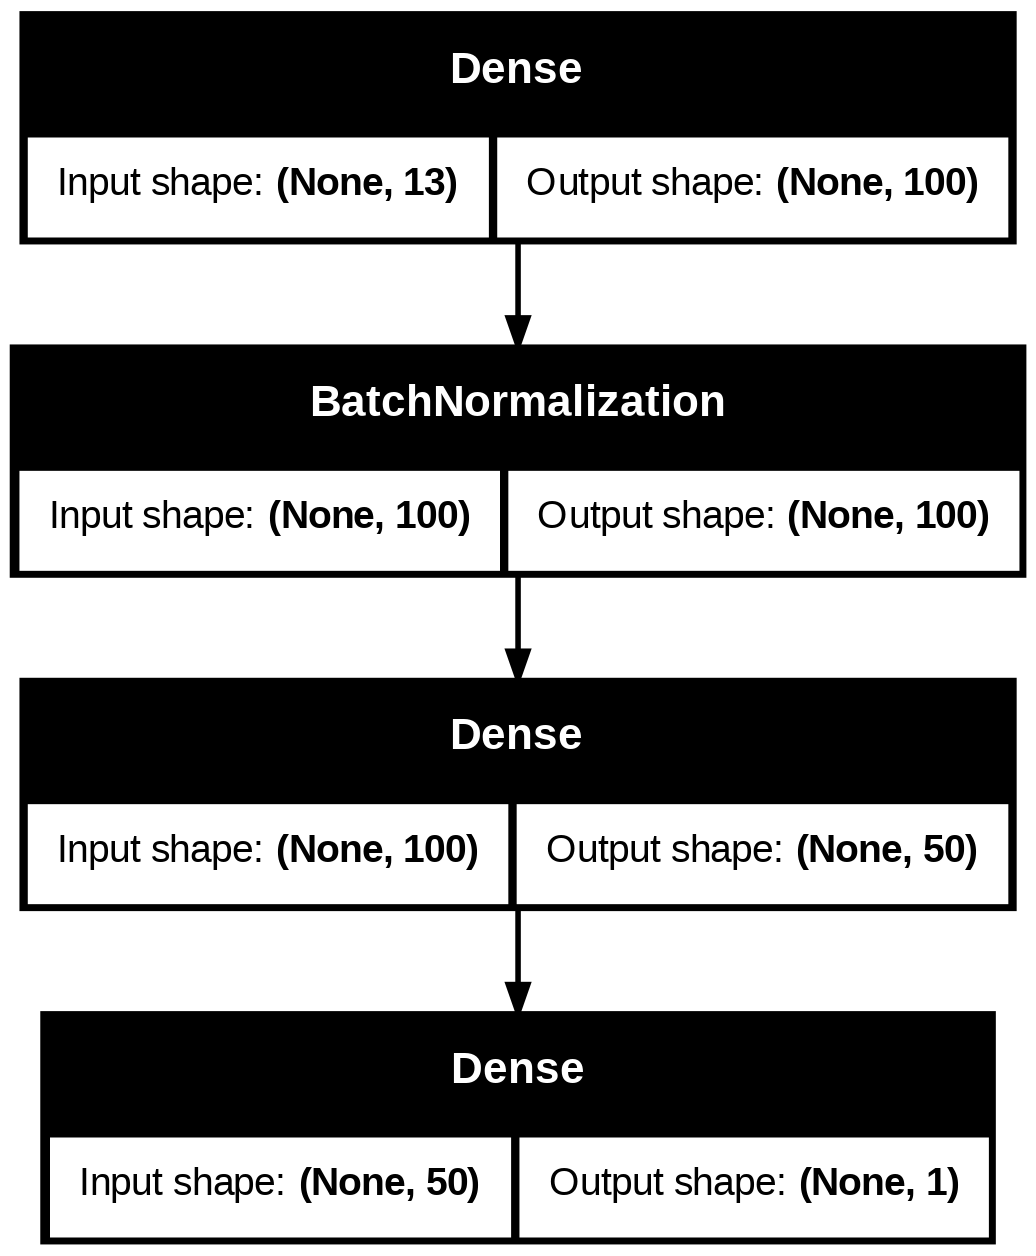

In [11]:

tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)          │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-3                  │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-4 (Dense)          │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [13]:

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [14]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 592.0974 - mae: 22.8275 - val_loss: 1710.3538 - val_mae: 37.9117
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 548.1225 - mae: 22.1312 - val_loss: 923.8390 - val_mae: 28.9091
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 522.2984 - mae: 21.4876 - val_loss: 814.5773 - val_mae: 27.1614
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 499.1470 - mae: 20.9864 - val_loss: 798.4056 - val_mae: 27.1768
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 453.4002 - mae: 19.9986 - val_loss: 630.0801 - val_mae: 24.0104
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 388.0369 - mae: 18.6314 - val_loss: 366.6996 - val_mae: 18.1943
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 349.9666 - mae: 17.2657 - val_loss: 305.9852 - val_mae: 16.5732
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 195.6335 - mae: 12.8735 - val_loss: 75.8638 - val_mae: 6.8217
Epoch 9/20
13/13 ━━

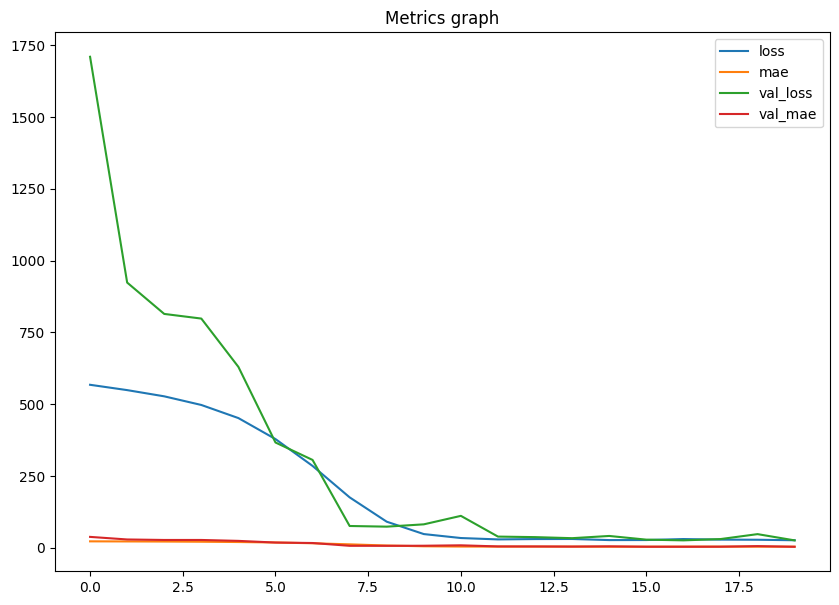

In [15]:

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [16]:

y_pred = model.predict(x_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


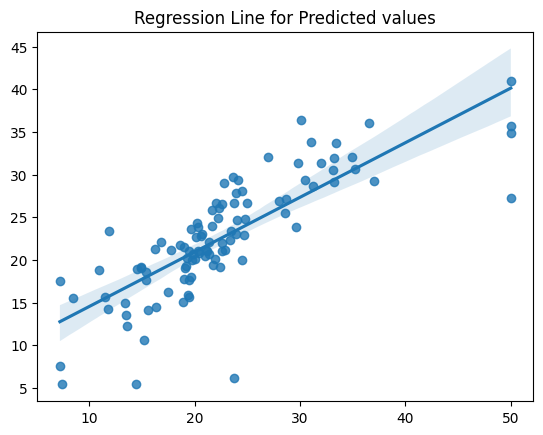

In [17]:

sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [18]:

def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [19]:

regression_metrics_display(y_test, y_pred)


MAE is 3.4518530752144603
MSE is 25.724424197988807
R2 score is 0.6387121153698849
